In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
# Evaluations
from sklearn.metrics import classification_report,confusion_matrix
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# TensorFlow
import tensorflow as tf
# LogisticRegression
from sklearn.linear_model import LogisticRegression
# SGDClassifier
from sklearn.linear_model import SGDClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# GaussianNB
from sklearn.naive_bayes import GaussianNB
# LinearSVC
from sklearn.svm import LinearSVC

In [31]:
pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (12, 9)


In [32]:
stars = pd.read_csv(r'C:\Users\ftokarev\Documents\AI University\task1\pulsaring\aiuniversityhomework\predicting-a-pulsar-star\pulsar_stars.csv')
stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.56,55.68,-0.23,-0.70,3.20,19.11,7.98,74.24,0
1,102.51,58.88,0.47,-0.52,1.68,14.86,10.58,127.39,0
2,103.02,39.34,0.32,1.05,3.12,21.74,7.74,63.17,0
3,136.75,57.18,-0.07,-0.64,3.64,20.96,6.90,53.59,0
4,88.73,40.67,0.60,1.12,1.18,11.47,14.27,252.57,0


In [33]:
stars.columns = ['Mean_of_the_integrated_profile',
'Standard_deviation_of_the_integrated_profile',
'Excess_kurtosis_of_the_integrated_profile',
'Skewness_of_the_integrated_profile',
'Mean_of_the_DM_SNR_curve',
'Standard_eviation_of_the_DM_SNR_curve',
'Excess_kurtosis_of_the_DM_SNR_curve',
'Skewness_of_the_DM_SNR_curve',
'target_class']
# Checking the presence of null values in the data set
stars.isnull().any()

Mean_of_the_integrated_profile                  False
Standard_deviation_of_the_integrated_profile    False
Excess_kurtosis_of_the_integrated_profile       False
Skewness_of_the_integrated_profile              False
Mean_of_the_DM_SNR_curve                        False
Standard_eviation_of_the_DM_SNR_curve           False
Excess_kurtosis_of_the_DM_SNR_curve             False
Skewness_of_the_DM_SNR_curve                    False
target_class                                    False
dtype: bool

# Data Visualization
Correlation Plot

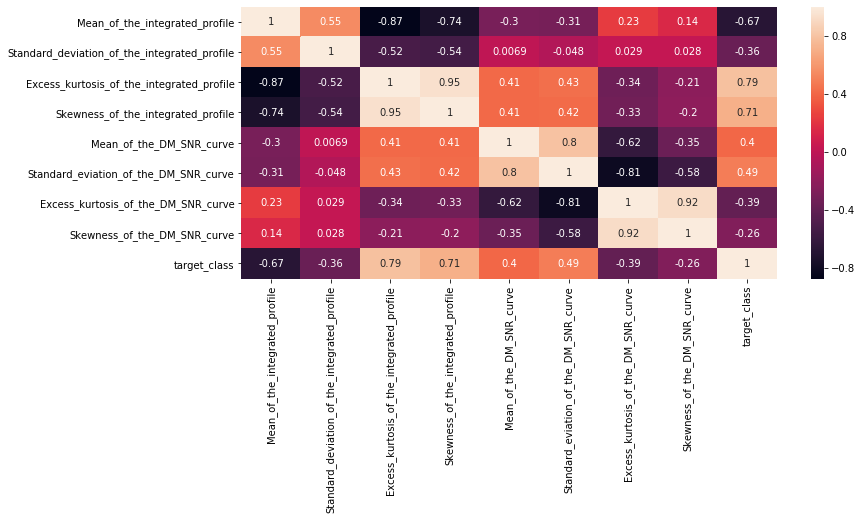

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(stars.corr(),annot=True)

Count Plot of target

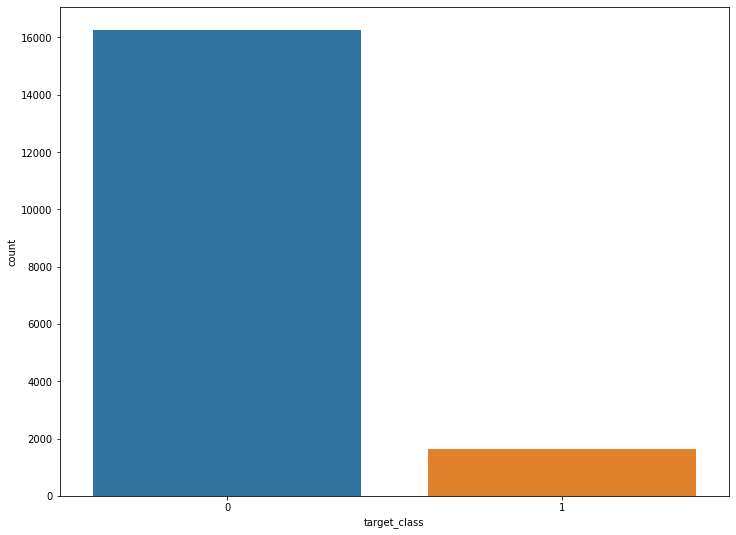

In [35]:
# Count plot for target which displays total zeros and ones
sns.countplot(x='target_class', data=stars)

Pair Plot

C:\Users\ftokarev\AppData\Local\Continuum\anaconda3\envs\NN_Env\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ftokarev\AppData\Local\Continuum\anaconda3\envs\NN_Env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


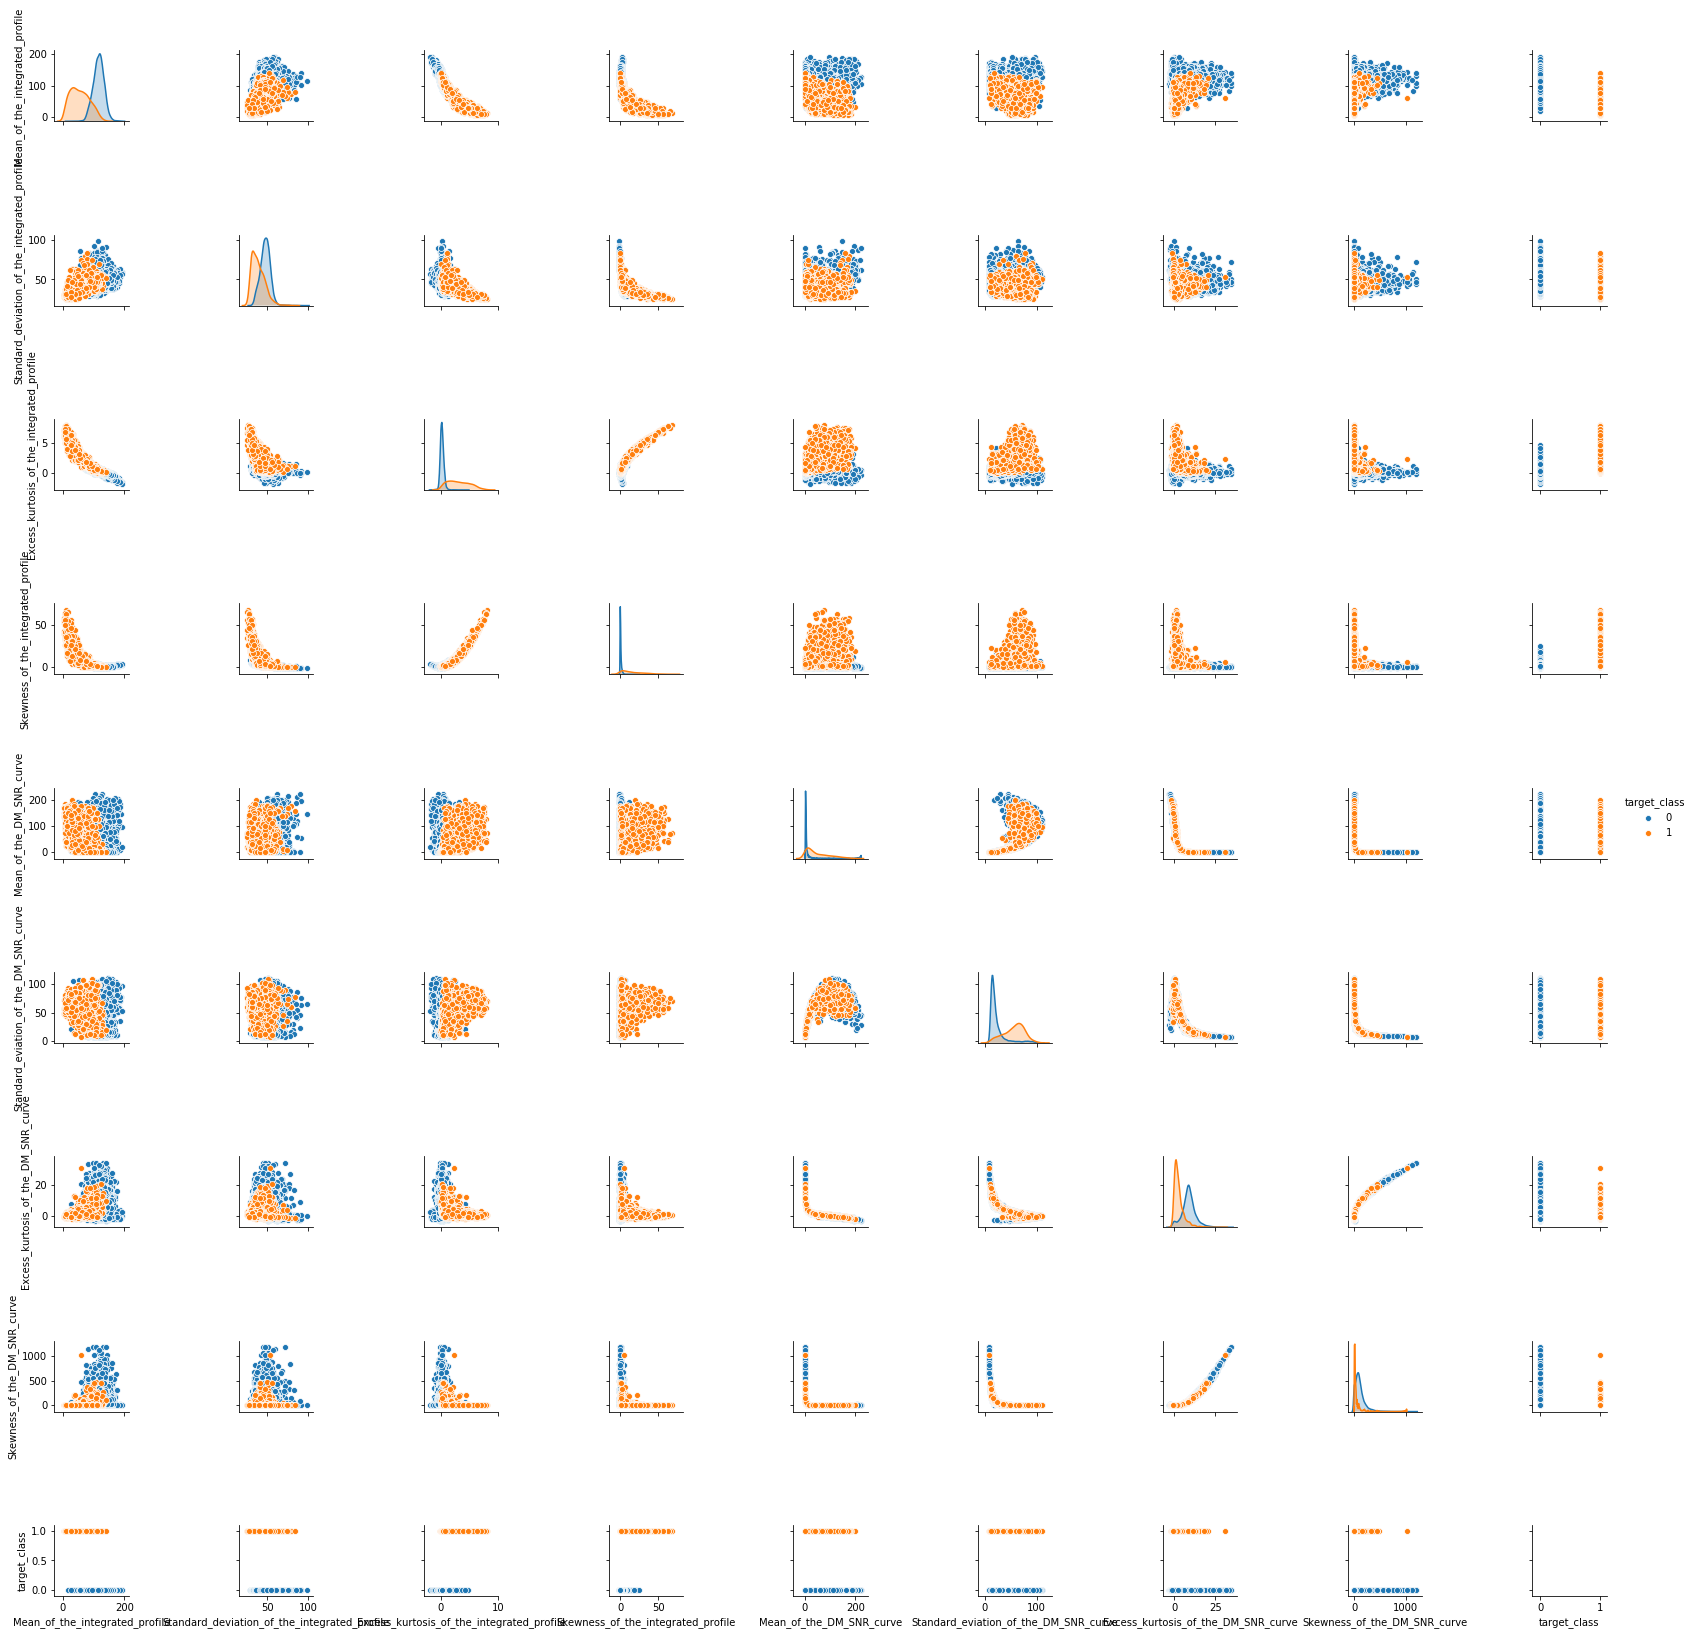

In [36]:
sns.pairplot(data=stars, hue='target_class')

In [37]:
df = stars.copy()
df.head(5)

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.56,55.68,-0.23,-0.70,3.20,19.11,7.98,74.24,0
1,102.51,58.88,0.47,-0.52,1.68,14.86,10.58,127.39,0
2,103.02,39.34,0.32,1.05,3.12,21.74,7.74,63.17,0
3,136.75,57.18,-0.07,-0.64,3.64,20.96,6.90,53.59,0
4,88.73,40.67,0.60,1.12,1.18,11.47,14.27,252.57,0


In [38]:
# Remove target column
def data_prep(df):
    feature_columns = df.columns[:-1]
    df_features = pd.DataFrame(data=df, columns=feature_columns)
    return df_features
                              
# Calling the function data_prep to get the feature columns
df_features = data_prep(df)
# Print top 5 lines of feature columns
df_features.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve
0,140.56,55.68,-0.23,-0.70,3.20,19.11,7.98,74.24
1,102.51,58.88,0.47,-0.52,1.68,14.86,10.58,127.39
2,103.02,39.34,0.32,1.05,3.12,21.74,7.74,63.17
3,136.75,57.18,-0.07,-0.64,3.64,20.96,6.90,53.59
4,88.73,40.67,0.60,1.12,1.18,11.47,14.27,252.57


In [39]:
# Spiting the data to train and test the model
X = df_features.copy()
y = df['target_class'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Standard Scaler

In [40]:
# Custom scaler function
def standardScaling(feature):
   scaler = StandardScaler().fit(feature)
   scaled_feature = scaler.transform(feature)
   scaled_feat = pd.DataFrame(data = scaled_feature, columns = df_features.columns)
   return scaled_feat

# Calling the scaler function by passing X_train and X_test to get the scaled data set
X_train_scaled = standardScaling(X_train)
X_test_scaled = standardScaling(X_test)
# Print X_train scaled data
X_train_scaled.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve
0,-0.61,0.55,0.58,-0.10,4.48,2.60,-1.93,-1.00
1,-0.51,0.13,0.23,-0.18,-0.26,0.14,-0.44,-0.61
2,0.76,1.17,-0.38,-0.38,0.02,1.06,-1.01,-0.87
3,0.88,1.99,-0.55,-0.39,-0.35,-0.59,0.32,0.13
4,-0.22,0.19,-0.19,-0.28,-0.35,-0.54,0.27,0.06


During scaling process the index of X_train and X_test are changed. So, you must also reset the index of y_train and y_test as below, otherwise you will get index mismatch error.

In [41]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# TensorFlow

Create input functions

In [42]:
# Create a input function to train the model
input_func_train = tf.estimator.inputs.pandas_input_fn(x=X_train_scaled,y=y_train, batch_size=50,shuffle=True)
# Create a input function to evaluate the model after train
input_func_test = tf.estimator.inputs.pandas_input_fn(x=X_test_scaled,y=y_test, batch_size=50,shuffle=False)
# Create a input function for prediction
input_func_prediction = tf.estimator.inputs.pandas_input_fn(x=X_test_scaled,y=y_test, batch_size=50,shuffle=False)

Feature Columns

In [43]:
# Get all feature columns
df_features.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_eviation_of_the_DM_SNR_curve',
       'Excess_kurtosis_of_the_DM_SNR_curve', 'Skewness_of_the_DM_SNR_curve'],
      dtype='object')

In [44]:
# Defining the model's feature columns
my_feature_columns = []

In [45]:
for col in df_features.columns:
    my_feature_columns.append(tf.feature_column.numeric_column(col))
# Print feature columns
my_feature_columns


[NumericColumn(key='Mean_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Standard_deviation_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Excess_kurtosis_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Skewness_of_the_integrated_profile', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Mean_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Standard_eviation_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Excess_kurtosis_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Skewness_of_the_DM_SNR_curve', shape=(1,), default_value=None, dtype=tf.float

Instantiate an estimator

In [46]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden #layer.
classifier = tf.estimator.DNNClassifier(
feature_columns=my_feature_columns,
# Two hidden layers of 10 nodes each.
hidden_units=[10,10],
# The model must choose between 2 classes.
n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ftokarev\\AppData\\Local\\Temp\\tmptcaajx85', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000025AA82B5EF0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Train the model

In [47]:
# Train the model by calling the Estimator's train method
classifier.train(input_fn=input_func_train, steps=50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ftokarev\AppData\Local\Temp\tmptcaajx85\model.ckpt.
INFO:tensorflow:loss = 28.688086, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\ftokarev\AppData\Local\Temp\tmptcaajx85\model.ckpt.
INFO:tensorflow:Loss for final step: 3.8101974.


Making prediction from the trained model

In [48]:
#prediction_fn=tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)
predictions = list(classifier.predict(input_fn=input_func_prediction))
predictions[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\ftokarev\AppData\Local\Temp\tmptcaajx85\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-3.7094965], dtype=float32),
 'logistic': array([0.02390441], dtype=float32),
 'probabilities': array([0.97609556, 0.02390443], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

Classification Report and Confusion Matrix

In [50]:
final_predictions = []
for pred in predictions:
    final_predictions.append(pred['class_ids'][0])

In [51]:
print('Classification Reprt: \n')
print(classification_report(y_test,final_predictions))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,final_predictions))

Classification Reprt: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.79      0.86       501

    accuracy                           0.98      5370
   macro avg       0.96      0.89      0.92      5370
weighted avg       0.97      0.98      0.97      5370


Confusion Matrix: 

[[4842   27]
 [ 104  397]]


# Random Forest

In [54]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predictions and Evaluations With Random Forest

In [84]:
# Prediction using Random Forest Model
rf_prediction = rf_model.predict(X_test_scaled)
# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,rf_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,rf_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.93      0.85      0.89       501

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4836   33]
 [  77  424]]


# Stochastic Gradient Descent¶

In [74]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train_scaled, y_train)
sgd_prediction = sgd.predict(X_test_scaled)

# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,sgd_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,sgd_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4869
           1       0.94      0.78      0.85       501

    accuracy                           0.98      5370
   macro avg       0.96      0.89      0.92      5370
weighted avg       0.97      0.98      0.97      5370


Confusion Matrix: 

[[4846   23]
 [ 111  390]]


# Logistic Regression

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_prediction = logreg.predict(X_test_scaled)

# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,logreg_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,logreg_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.83      0.88       501

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4843   26]
 [  83  418]]


C:\Users\ftokarev\AppData\Local\Continuum\anaconda3\envs\NN_Env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# k-Nearest Neighbors

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_prediction = logreg.predict(X_test_scaled)

# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,knn_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,knn_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.83      0.88       501

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4843   26]
 [  83  418]]


# Gaussian Naive Bayes

In [87]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_prediction = logreg.predict(X_test_scaled)

# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,gaussian_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,gaussian_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.83      0.88       501

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4843   26]
 [  83  418]]


# Linear Support Vector Classifier

In [90]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_prediction = logreg.predict(X_test_scaled)

# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,linear_svc_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,linear_svc_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.83      0.88       501

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4843   26]
 [  83  418]]


C:\Users\ftokarev\AppData\Local\Continuum\anaconda3\envs\NN_Env\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Random forest is the best, going on model tuning

In [91]:
# Re-instantiate and retrain the model to find feature importances

                                              Importance
Feature                                                 
Excess_kurtosis_of_the_integrated_profile           0.33
Skewness_of_the_integrated_profile                  0.23
Mean_of_the_integrated_profile                      0.19
Standard_eviation_of_the_DM_SNR_curve               0.06
Mean_of_the_DM_SNR_curve                            0.06
Standard_deviation_of_the_integrated_profile        0.05
Skewness_of_the_DM_SNR_curve                        0.04
Excess_kurtosis_of_the_DM_SNR_curve                 0.03


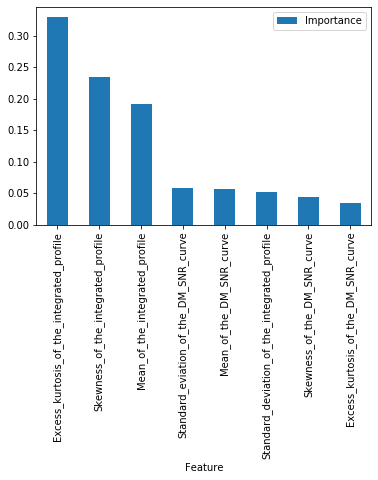

In [93]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
importances = pd.DataFrame({'Feature':stars.columns.drop('target_class'), 'Importance':rf.feature_importances_}).set_index('Feature')
importances = importances.sort_values('Importance', ascending=False)
print(importances)
importances.plot.bar()
plt.show()

The last 2 features are weak and can be dropped to improve accuracy, therefore, we’ll do just that by dropping last 2 indices of ‘importances’ out of the train and test sets

In [130]:
X_train = X_train_scaled.drop(list(importances.index[-2:]), axis=1)
X_test = X_test_scaled.drop(list(importances.index[-2:]), axis=1)
rf.fit(X_train, y_train)
print("Model's accuracy before dropping weak features: ", rf_model.score(X_test_scaled, y_test))
print("Model's accuracy after dropping weak features: ", rf.score(X_test, y_test))

Model's accuracy before dropping weak features:  0.9795158286778398
Model's accuracy after dropping weak features:  0.9798882681564246


In [131]:
# Prediction using Random Forest Model
rf_prediction = rf.predict(X_test)
# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,rf_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,rf_prediction))

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.93      0.85      0.89       501

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4838   31]
 [  77  424]]


Tune the model

In [134]:
# rf_ft = RandomForestClassifier(criterion = "gini", 
#                                        min_samples_leaf = 1, 
#                                        min_samples_split = 30,   
#                                        n_estimators=150, 
#                                        max_features='auto', 
#                                        oob_score=True, 
#                                        random_state=1, 
#                                        n_jobs=-1)

# rf_ft.fit(X_train, y_train)
# print("Model's accuracy after tuning it: ",rf_ft.score(X_test, y_test))
# # Prediction using Random Forest Model
# rf_prediction = rf_ft.predict(X_test)
# # Evaluations
# print('Classification Report: \n')
# print(classification_report(y_test,rf_prediction))
# print('\nConfusion Matrix: \n')
# print(confusion_matrix(y_test,rf_prediction))

In [166]:
rf_ft = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 30,   
                                       n_estimators=120, 
                                       max_features='log2', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf_ft.fit(X_train, y_train)
print("Model's accuracy after tuning it: ",rf_ft.score(X_test, y_test))
# Prediction using Random Forest Model
rf_prediction = rf_ft.predict(X_test)
# Evaluations
print('Classification Report: \n')
print(classification_report(y_test,rf_prediction))
print('\nConfusion Matrix: \n')
print(confusion_matrix(y_test,rf_prediction))

Model's accuracy after tuning it:  0.9810055865921787
Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4869
           1       0.94      0.85      0.89       501

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370


Confusion Matrix: 

[[4843   26]
 [  76  425]]
